In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df_all=pd.read_csv('법정동데이터ver2.csv')
df_all.head()

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
0,0,8,0.000000,0,0,70.44,0.0,7853.606094,51,27.666667,908.2,0.539394,121155.06,9522.102855,16882
1,1,0,0.000000,0,0,70.44,0.0,2301.024680,32,9.666667,908.2,0.000000,121155.06,9522.102855,0
2,2,0,0.000000,0,0,70.44,0.0,983.529811,16,1.666667,908.2,0.000000,121155.06,9522.102855,0
3,3,2,0.000000,0,0,70.44,0.0,1838.011626,33,1.000000,908.2,0.000000,121155.06,9522.102855,24012
4,4,1,290.058108,5,0,70.44,0.0,2002.683230,34,0.666667,908.2,0.068966,121155.06,9522.102855,32494


In [32]:
df_all=df_all.assign(
    대중교통 = lambda x: x['버스정류장수'] + x['지하철역수'],
    자전거도로수용율 = lambda x: x['자전거도로길이'] /x['도로길이'],
    인구 = lambda x:x['직장인구'] +x['생활인구']
)
df_use=df_all[['대중교통','자전거도로수용율','평균경사도','인구','추정교통량','안정성지수평균','자전거이용량']]
df_use.fillna(0,inplace=True)

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
df_cl=df_use[['자전거도로수용율','안정성지수평균']]
df_cl.isna().sum()

자전거도로수용율    0
안정성지수평균     0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df_use[['자전거도로수용율','안정성지수평균']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [43]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data_scale)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.196


In [44]:
from sklearn.cluster import MeanShift, estimate_bandwidth

## MeanShift 클래스
meanshift=MeanShift(bandwidth = .196) # bandwidth를 파라미터로 갖는다.

## estimate_bandwidth
cluster_labels = meanshift.fit_predict(data_scale)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [45]:
df_use.loc[:,'cluster'] = cluster_labels
df_use

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,8,0.000000,27.666667,1.306772e+05,908.2,0.539394,16882,0
1,0,0.000000,9.666667,1.306772e+05,908.2,0.000000,0,0
2,0,0.000000,1.666667,1.306772e+05,908.2,0.000000,0,0
3,2,0.000000,1.000000,1.306772e+05,908.2,0.000000,24012,0
4,1,0.144835,0.666667,1.306772e+05,908.2,0.068966,32494,0
...,...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.0,0.592944,295388,0
463,32,0.241067,2.333333,1.291689e+06,69951.0,0.690722,287342,0
464,61,0.176436,0.333333,3.045575e+06,40420.0,0.804035,1236036,0
465,54,0.147195,2.333333,1.560991e+06,31903.0,0.708297,719840,0


In [46]:
df_use['cluster'].unique()

array([0, 1, 2], dtype=int64)

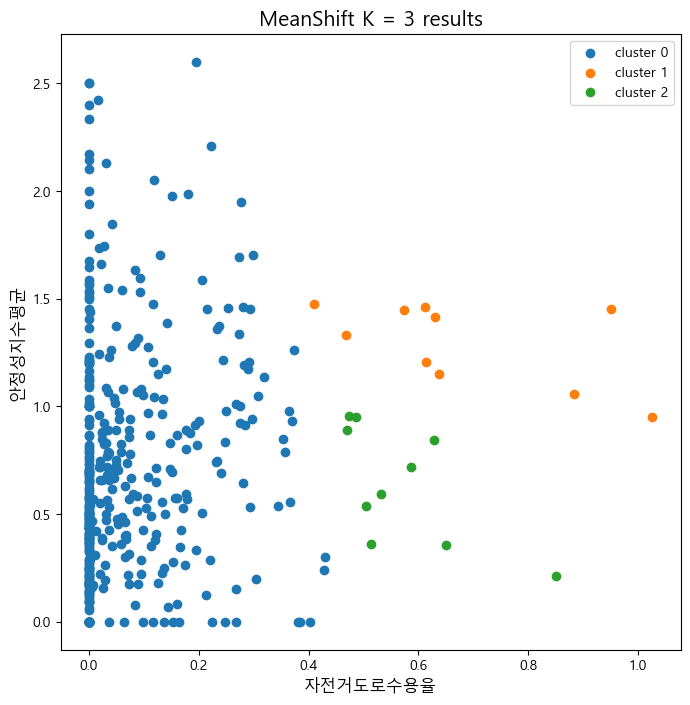

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
k= 3
for i in range(k):
    plt.scatter(df_use.loc[df_use['cluster'] == i, '자전거도로수용율'], df_use.loc[df_use['cluster'] == i, '안정성지수평균'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('MeanShift K = %d results'%k , size = 15)
plt.xlabel('자전거도로수용율', size = 12)
plt.ylabel('안정성지수평균', size = 12)
plt.show()

In [41]:
df_use.groupby('cluster').mean()

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량
cluster,,,,,,,
0,24.397163,0.063520,4.564224,1.212715e+06,12929.362703,0.599754,179426.189125
1,32.083333,0.697871,3.166667,4.279587e+06,22320.694444,0.978285,529541.000000
2,32.666667,0.430290,9.629630,2.526201e+06,28354.555556,1.206414,383535.333333
3,44.125000,0.047959,23.875000,1.008783e+06,24598.570833,0.335220,286373.250000
4,19.733333,0.057126,7.488889,4.601186e+05,7884.245096,2.160821,69671.866667
